In [20]:
# Import library
from Bio import Entrez, SeqIO # Extract info from NCBI
from Bio.SeqUtils import molecular_weight # Molecular weight
from Bio.SeqUtils import gc_fraction # GC content
import matplotlib.pyplot as plt # Visualization
import numpy as np # numpy
from collections import Counter # Counter

In [3]:
# Error handling
class URLError(Exception):
    """Custom exception for URL errors."""
    pass
class InvalidIDError(Exception):
    """Custom exception for invalid ID errors."""
    pass
class InvalidFormatError(Exception):
    """Custom exception for invalid format errors."""
    pass
class InvalidEmailError(Exception):
    """Custom exception for invalid email errors."""
    pass
class InvalidDatabaseError(Exception):
    """Custom exception for invalid database errors."""
    pass
class InvalidTermError(Exception):
    """Custom exception for invalid term errors."""
    pass
class InvalidRetMaxError(Exception):
    """Custom exception for invalid retmax errors."""
    pass
class InvalidRetStartError(Exception):
    """Custom exception for invalid retstart errors."""
    pass
class InvalidRetModeError(Exception):
    """Custom exception for invalid retmode errors."""
    pass
class InvalidRetTypeError(Exception):
    """Custom exception for invalid rettype errors."""
    pass
class InvalidRetMaxError(Exception):
    """Custom exception for invalid retmax errors."""
    pass
class InvalidRetStartError(Exception):
    """Custom exception for invalid retstart errors."""
    pass
class InvalidRetModeError(Exception):
    """Custom exception for invalid retmode errors."""
    pass

In [4]:
# check flu spell of key word
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.espell(term="infulanza",db="pubmed") # search term
    record = Entrez.read(handle)
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
finally: # close the handle
    handle.close()
# print the result
print(f'incorrect spell is "{record["Query"]}" and correct spell is "{record["CorrectedQuery"]}" and searched in {record["Database"]} db"')

incorrect spell is "infulanza" and correct spell is "influenza" and searched in pubmed db"


In [5]:
# Search flu in  nocleotide data base
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should say how you are.
    handle = Entrez.esearch(db="nucleotide", term="influenza", retmax=100) # Search in the nucleotode database for a specific Gene. 
    result = Entrez.read(handle) # Read.
# handle errors
except URLError: 
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetMaxError:
    print("Please check the retmax you are trying to access.")
finally:
    handle.close() # After giving a result you should close that.
# Printing all info
for key,value in result.items():
    print(key,":" ,value)

Count : 1763227
RetMax : 100
RetStart : 0
IdList : ['2054381023', '1904926759', '567757606', '2950205811', '2950205808', '2950193422', '2950193419', '2950193416', '2950193414', '2950193411', '2950193409', '2950193406', '2950193404', '2950193397', '2950193394', '2950193391', '2950193388', '2950193386', '2950193384', '2950193381', '2950193379', '2950161324', '2950161322', '2950161320', '2950161318', '2950161316', '2950161314', '2950161306', '2950161304', '2950161302', '2950161300', '2950161298', '2950161296', '2950161294', '2950161290', '2950161288', '2950161286', '2950157010', '2950157008', '2950156998', '2950156996', '2950156974', '2950156971', '2950156969', '2950156967', '2950156965', '2950156963', '2950156961', '2950156959', '2950156957', '2950156955', '2949928563', '2949894487', '2949894485', '2949894050', '2949893922', '2949893920', '2949893917', '2949893915', '2949893913', '2949893911', '2949893909', '2949893907', '2949893905', '2949893712', '2949893538', '2949893536', '2949893534

In [6]:
# Show summery of nucleotide  for 50 id for FLU

list_of_pubmed_id = ['2054381023', '1904926759', '567757606', '2950205811', '2950205808', '2950193422', '2950193419', '2950193416', '2950193414', '2950193411', '2950193409', '2950193406', '2950193404', '2950193397', '2950193394', '2950193391', '2950193388', '2950193386', '2950193384', '2950193381', '2950193379', '2950161324', '2950161322', '2950161320', '2950161318', '2950161316', '2950161314', '2950161306', '2950161304', '2950161302', '2950161300', '2950161298', '2950161296', '2950161294', '2950161290', '2950161288', '2950161286', '2950157010', '2950157008', '2950156998', '2950156996', '2950156974', '2950156971', '2950156969', '2950156967', '2950156965', '2950156963', '2950156961', '2950156959', '2950156957', '2950156955', '2949928563', '2949894487', '2949894485', '2949894050', '2949893922', '2949893920', '2949893917', '2949893915', '2949893913', '2949893911', '2949893909', '2949893907', '2949893905', '2949893712', '2949893538', '2949893536', '2949893534', '2949893530', '1824751325', '1824751262', '1824751259', '1824751256', '1824751253', '1824751250', '1824751247', '1824751246', '1824751244', '1824751242', '1824751239', '1824751237', '1824751234', '1824751232', '1824751228', '1824751225', '1824751222', '1824751219', '1824751217', '1824751214', '1824751211', '1824751208', '1824751204', '1824751201', '1824751198', '1824751193', '1824751190', '1824751187', '1824751184', '1824751181', '1824751177']

NUM = len(list_of_pubmed_id) # counter
Entrez.email = "seyedmilad.hashemichepi@gmail.com"  # You should say how you are.
# loop for return several summery
try:
    for pub_id in list_of_pubmed_id:
        print()
        print("#" * 13)
        # Counter
        print(f"ID number {NUM}")
        NUM -= 1
        print("#" * 13)
        # Get summery from id    
        handle = Entrez.esummary(db="nucleotide", id=pub_id)  
        record = Entrez.read(handle) # Read
        #Print info
        print("*-*" * 30)
        print("Title :", record[0]["Title"])
        print("ID : ", record[0]["Id"])
        print("===" * 45)
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetMaxError:
    print("Please check the retmax you are trying to access.")   
finally:
    handle.close()  # After giving a result you should close that.


#############
ID number 100
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Homo sapiens chloride intracellular channel 1 (CLIC1), transcript variant 2, mRNA
ID :  2054381023

#############
ID number 99
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Homo sapiens chloride intracellular channel 1 (CLIC1), transcript variant 3, mRNA
ID :  1904926759

#############
ID number 98
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Homo sapiens chloride intracellular channel 1 (CLIC1), transcript variant 1, mRNA
ID :  567757606

#############
ID number 97
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : PREDICTED: Nerophis lumbriciformis influenza virus NS1A binding protein a (ivns1abpa), transcript variant X2, mRNA
ID :  2950205811

######

In [7]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589463.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589463.1
Name: HE589463
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 1, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589463']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGAGAGAATAAAAGAACTGAGAGATCTAATGTCGCAGTCCCGCACTCGCGAG...TAG')


In [8]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGGAGAGAATAAAAGAACTGAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATAATCACTAAGACCACTGTGGACCATATGGCCATAATCAAAAAGTACACATCAGGAAGGCAAGAGAAGAACCCCGCACTCAGAATGAAGTGGATGATGGCAATGAGATACCCAATTACAGCAGACAAGAGAATAATGGACATGATTCCGGAGAGGAATGAACAAGGACAAACCCTCTGGAGCAAAACAAACGATGCTGGATCAGACCGAGTGATGGTATCACCTCTGGCCGTGACATGGTGGAACAGAAATGGCCCAACAACAAGTACAGTTCATTACCCTAAGGTATATAAAACTTATTTCGAAAAGGTCGAAAGGTTGAAACATGGTACCTTCGGCCCTGTCCACTTCAGAAAGCAAGTTAAAATAAGGAGGAGAGTTGATACAAACCCTGGCCATGCAGATCTCAGTGCCAAGGAGGCACAGGATGTGTTTATGGAAGTTGTTTTCCCAAATGAAGTGGGGGCAAGAATACTGACATCAGAGTCACAGCTGGCAATAACAAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAAATTGCTCCATTGATGGTGGCGCACATGCTAGAAAGAGAATTGGTCCGTAAAACAAGGTTTCTCCCAGTAGCCGGTGGAACAGGCAGTGTTTATATTGAATTGTTGCACTTAACCCAAGGGACGTGCTGGGAGCAGATGTACACTCCAGGAGGAGAAGTGAGAAATGATGATGTTGACCAAAGTTTGATTATCGCTGCTAGAAACATAGTAAGAAGAGCAGCAGTGTCAGCAGACCCATTAGCATCTCTCTTGGAAATGTGCCACAGCACACAGATTGGAGGAGTAAGGATGGTGGACATCCTTAGACAGAATCCAACTGAGGAACAAGCCGTAGACATATGCAAGGCAGCAATAGGGTTGAGGATTAGCTCATCTTTCAGTTTTGGTGGGTTCACTTTCAAAAGGACAA

In [9]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 1 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 1 consists of 2280 nucleotides.


In [10]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 1 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 1 is 708785.34 kilodaltons.


In [11]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 1 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 1 is %45 percent.


In [12]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 2280
Nucleotide A : 771 ====> %34 percent
Nucleotide T : 494 ====> %22 percent
Nucleotide C : 428 ====> %19 percent
Nucleotide G : 587 ====> %26 percent
Nucleotide GC : 1015 ====> %45 percent


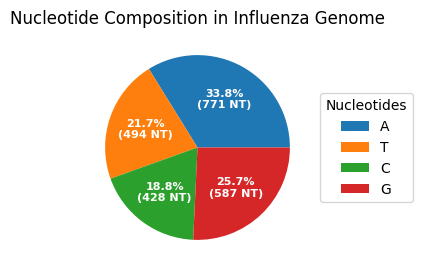

In [21]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()